# Ex. 2.2 - Random Walk 3D 

## Random Walk su reticolo cubico

Il random walk su reticolo costituisce un esempio di processo stocoastico di Markov a tempo discreto, in cui la posizione $x$ nello spazio euclideo è una variabile aleatoria ottenuta dalla somma di passi discreti casuali e indipendenti tra loro:

$$\vec x_{t}=\vec x_{t-1}+a\vec w_{t}\hspace{0.1cm},\hspace{0.5cm} \vec x_{t}= x_0 +a\sum_{i=1}^t \hat w_{i}$$

dove $a$ è la lunghezza del passo (passo del reticolo) e $\hat w_{i}$ una random variabile che segue la seguente distribuzione di probabilità:
$$p(\hat w)=\frac{1}{6}\sum_{i=1}^{3}\big (\delta(\hat w-\hat x_i)+\delta(\hat w +\hat x_i)\big )$$
dove con $\hat x_i$ sono indicati i versori diretti come gli assi cartesiani.

La distribuzione $p(\hat w)$ ha valor medio $\langle\hat w\rangle=0$ e varianza $\sigma^2_w =1$.

Per studiare l'andamento della variabile $x_{t}$ un'idea potrebbe essere quella di utilizzare il suo valor medio, ma è immediato verificare che questo non dipende da $t$ (è nullo se $\vec x_0$ coincide con l'origine) e che, quindi, non contiene molte informazioni interessanti. Si studia quindi la varianza $\sigma^2_{\vec x}$, che coincide (se $\vec x_0$ coincide con l'origine) con il valor medio della distanza - al quadrato - dall'origine $r_t^2=x^2_t+y^2_t+z^2_t$. Sfruttando l'indipendenza delle variabili $\hat w_i$ ($\langle \hat w_i\cdot \hat w_j\rangle=0$ per $i\neq j$) si ottiene il seguente risultato:

$$\langle r_t^2 \rangle = \big \langle \bigg(a\sum_{i=1}^t \vec w_i\bigg)^2 \big \rangle = a^2\big \langle \sum_{i=1}^t \hat w_i \cdot \sum_{i=1}^t \hat w_i\big \rangle = a^2\big \langle \sum_{i=1}^t \hat w_i^2 + \sum_{i\neq j}^t \hat w_i \cdot\hat w_j\big \rangle = a^2\sum_{i=1}^t\underbrace{\langle \hat w_i^2\rangle}_{\sigma_w^2=1}+ a^2\sum_{i\neq j}^t\underbrace{\langle\hat w_i\cdot\vec w_j\rangle}_{0} = ta^2 $$

La distanza media dall'origine $\langle r_t\rangle:=\sqrt{\langle r_t^2 \rangle}$ è quindi legata al numero di passi $t$ dalla legge a potenza $\langle r_t\rangle=a\sqrt{t}$, che indica un comportamento di tipo diffusivo.

Si è quindi voluto verificare la legge a potenza attraverso la simulazione di cammini aleatori su reticolo cubico.

In questo esercizio sono state simulate random walk $3D$ su reticolo cubico con partenza nell'origine: ad ogni passo temporale è stato effettuato un passo di lunghezza $a=1$ - avanti o indietro - in una delle 3 direzioni spaziali ($x,y$ o $z$) ed è stata poi calcolata - sempre ad ogni passo - la distanza dall'origine, definita come $r = \sqrt{x^2+y^2+z^2}$. Per realizzare una singola RW sono stati effettuati $N_{step}=100$ passi. In pratica, per realizzare questo tipo di processo, è stato sufficiente campionare delle distribuzioni di probabilità uniformi.

Per studiare l'andamento $\textit medio$ di $r$ in funzione del tempo sono state generate $M=10^4$ realizzazioni di RW e l'errore statistico è stato calcolato grazie al metodo del $\textit blocking$ ($N=100$ blocchi).

Di seguito sono riportati i grafici di:
- distanza media $<r>$ - con errore statistico - in funzione del numero di passi (tempo discreto $t$), relativa al blocco $N$-esimo (curva di colore nero)
- distanza $r$ dall'origine in funzione di $t$ di 10 cammini (curve colorate)
- fit della distanza media $<r>$ dall'origine in funzione di $t$ con funzione $f(t)=k\sqrt{t}$ 

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
import decimal

# funzione per fit f(x)=k sqrt(x)
def f(x,k):
    return k* np.sqrt(x)

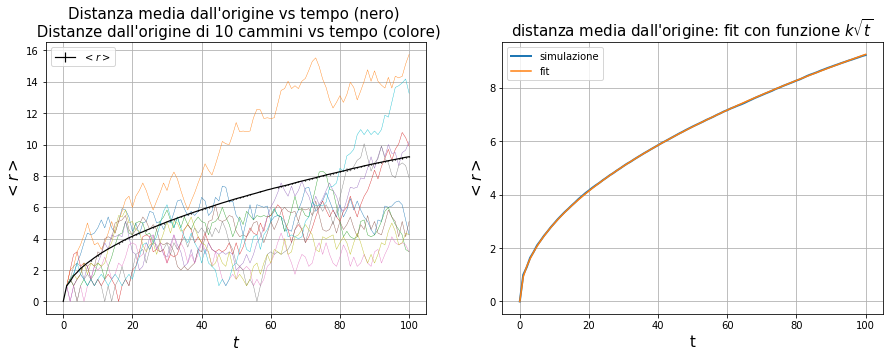

Parametro fit: k = 0.925
Parametro teorico: k = 1


In [5]:
# caricamento da file del valor medio di r(t) e dell'errore (blocco N) 
r, err = np.loadtxt("Output/Discrete_ave.txt", usecols=(0,1), delimiter = ' ', unpack = 'true')
L = len(r)
t = np.arange(L)

# caricamento da file dei valori "istantanei" di r per 10 cammini
inst_r = np.loadtxt("Output/Discrete_instant.txt", usecols=(0), delimiter = ' ', unpack = 'true')
x = np.arange(1,101)

# plot di <r> vs t e di r vs t per 10 cammini (sullo sfondo)
g = plt.figure(figsize=(15,5))

g.add_subplot(1,2,1)
for i in range(10):
    new_inst_r = inst_r[i*100:(i+1)*100]
    plt.plot(x,new_inst_r,linewidth=0.4)
plt.errorbar(t,r,yerr=err,linewidth=1.2,color='black',label='$<r>$')
plt.xlabel('$t$',size=15)
plt.ylabel('$<r>$',size=15)
plt.title('Distanza media dall\'origine vs tempo (nero) \n Distanze dall\'origine di 10 cammini vs tempo (colore)',size=15)
plt.legend()
plt.grid(True)

# plot di <r> vs t e del fit di <r> con la funzione f
g.add_subplot(1,2,2)
p_opt, p_cov = curve_fit(f, t, r)
r_fit = f(t,p_opt[0])
plt.plot(t,r,label='simulazione',linewidth=2)
plt.plot(t,r_fit,label='fit')
plt.xlabel('t',size=15)
plt.ylabel('$<r>$',size=15)
plt.title('distanza media dall\'origine: fit con funzione $k\sqrt{t}$',size=15)
plt.legend()
plt.grid(True)
plt.show()

print("Parametro fit: k =",round(p_opt[0],3))
print("Parametro teorico: k =",1)

Poichè per un processo aleatorio di tipo random walk (sommma di passi casuali indipendenti tra loro) lo spostamento quadratico medio dall'origine dopo un numero $N$ di passi di lunghezza $a$ è pari a $Na^2$, ci si aspetta che il parametro $k$ ottenuto dal fit sia $k=a=1$. In effetti, il risultato ottenuto dalla simulazione - $k\simeq0.93$ - è molto prossimo a $1$.

È interessante inoltre notare come l'errore - che aumenta all'aumentare della distanza dall'origine - sia molto piccolo (l'errore relativo è ~ $0.4\%$).

## Random Walk 3D nel continuo

Il random walk $3D$ nel continuo è anch'esso un processo di Markov a tempo discreto, ma in questo caso la variabile stocastica passo $\hat w$ può assumere una qualsiasi direzione nello spazio. Anche in questo caso la lunghezza del passo $a$ è fissa e quindi l'insieme delle possibili realizzazioni di $a\hat w$ è costituito da vettori - identificati dalla coppia di angoli $(\phi,\theta)\in [0,2\pi)\times[0,\pi)$ - che giacciono su una superficie sferica di raggio $a$. Per realizzare un random walk è quindi necessario campionare passi distribuiti uniformemente su questa superficie. Per campionare correttamente gli angoli $\phi$ e $\theta$ è necessario esprimere un elemento di area infinitesimo in coordinate sferiche:

$$dA=dxdydz=a^2sin\theta d\theta d\phi$$

La distribuzione di probabilità sarà $p(\phi,\theta)=p_\phi(\phi)\cdot p_\theta(\theta)\propto \frac{dA}{d\phi d\theta}$, dove:
 - $p_\phi(\phi)=\frac{1}{2\pi}$, $\phi \in [0,2\pi)$
 - $p_\theta(\theta)=\frac{1}{2}sin\theta$, $\theta \in [0,\pi)$

Per l'angolo $\phi$ va quindi bene un campionamento uniforme, mentre per l'angolo $\theta$ è necessario campionare la distribuzione di probabilità $p_\theta$, che si può ottenere con il metodo dell'inversa della cumulativa.

Come nel caso del random walk su reticolo cubico, è stato studiato l'andamento della distanza media dall'origine in funzione del tempo, utilizzando lo stesso procedimento e i medesimi parametri.

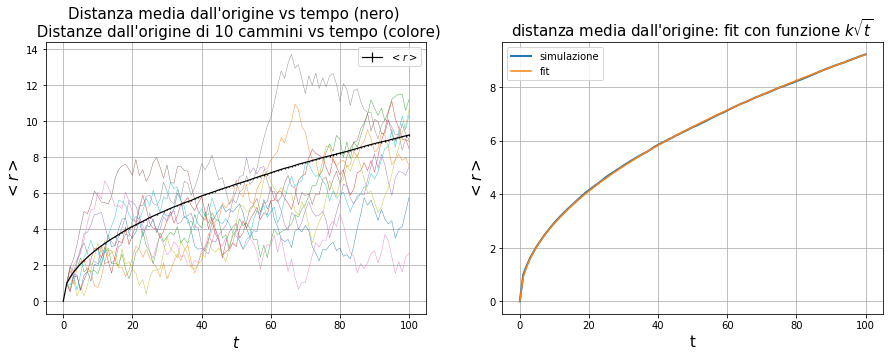

Parametro fit: k = 0.923
Parametro teorico: k = 1


In [7]:
# caricamento da file del valor medio di r(t) e dell'errore (blocco N) 
r, err = np.loadtxt("Output/Continuum_ave.txt", usecols=(0,1), delimiter = ' ', unpack = 'true')
L = len(r)
t = np.arange(L)

# caricamento da file dei valori "istantanei" di r per 10 cammini
inst_r = np.loadtxt("Output/Continuum_instant.txt", usecols=(0), delimiter = ' ', unpack = 'true')
x = np.arange(1,101)

# plot di <r> vs t e di r vs t per 10 cammini (sullo sfondo)
g = plt.figure(figsize=(15,5))

g.add_subplot(1,2,1)
for i in range(10):
    new_inst_r = inst_r[i*100:(i+1)*100]
    plt.plot(x,new_inst_r,linewidth=0.4)
plt.errorbar(t,r,yerr=err,linewidth=1.2,color='black',label='$<r>$')
plt.xlabel('$t$',size=15)
plt.ylabel('$<r>$',size=15)
plt.title('Distanza media dall\'origine vs tempo (nero) \n Distanze dall\'origine di 10 cammini vs tempo (colore)',size=15)
plt.legend()
plt.grid(True)

# plot di <r> vs t e del fit di <r> con la funzione f
g.add_subplot(1,2,2)
p_opt, p_cov = curve_fit(f, t, r)
r_fit = f(t,p_opt[0])
plt.plot(t,r,label='simulazione',linewidth=2)
plt.plot(t,r_fit,label='fit')
plt.xlabel('t',size=15)
plt.ylabel('$<r>$',size=15)
plt.title('distanza media dall\'origine: fit con funzione $k\sqrt{t}$',size=15)
plt.legend()
plt.grid(True)
plt.show()

print("Parametro fit: k =",round(p_opt[0],3))
print("Parametro teorico: k =",1)

Anche nel caso continuo i risultati sono in accordo con l'andamento teorico previsto e valgono le stesse considerazioni fatte nel caso precedente.